## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:20,.2f}'.format
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
df = pd.read_csv(r'Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df= df.drop(columns = ['Unnamed: 0'], axis=1)

In [5]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [6]:
df.isnull().mean().sort_values(ascending=False)

airline                            0.00
flight                             0.00
source_city                        0.00
departure_time                     0.00
stops                              0.00
arrival_time                       0.00
destination_city                   0.00
class                              0.00
duration                           0.00
days_left                          0.00
price                              0.00
dtype: float64

In [7]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

## Subsetting Relevant Data

In [8]:
# Dividing the columns in the dataset in to numeric and categorical attributes.
cols = set(df.columns)
cols_numeric = set(['duration', 'days_left', 'price'])
cols_categorical = list(cols - cols_numeric)


## Exploratory Data Analysis

### Univariate Analysis- Numerical

In [9]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = df[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Duration Attribute:
Duration(min) : 0.83
Q1                    : 6.83
Q2(Median)            : 11.25
Q3                    : 16.17
Duration(max) : 49.83


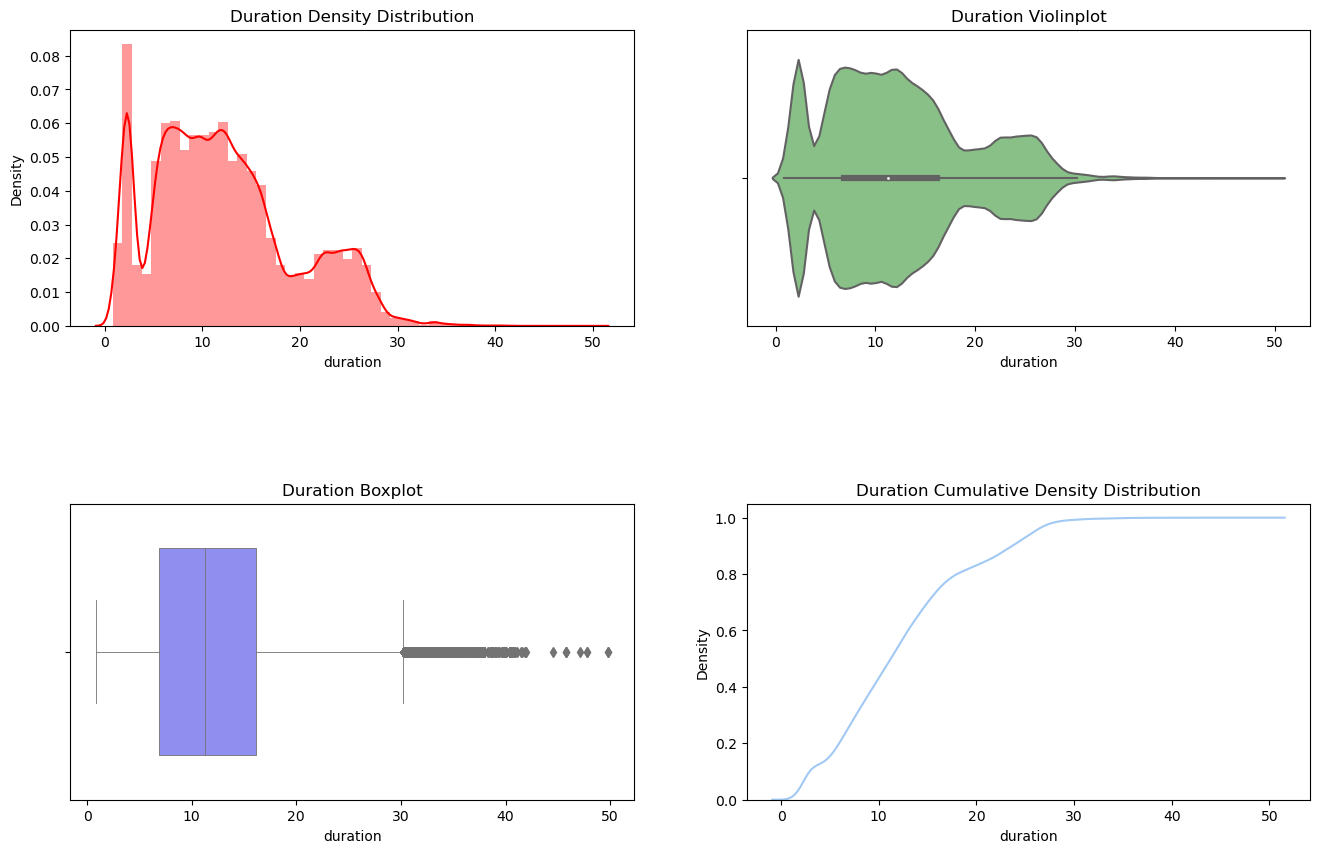

5 Point Summary of Price Attribute:
Price(min) : 1105
Q1                    : 4783.0
Q2(Median)            : 7425.0
Q3                    : 42521.0
Price(max) : 123071


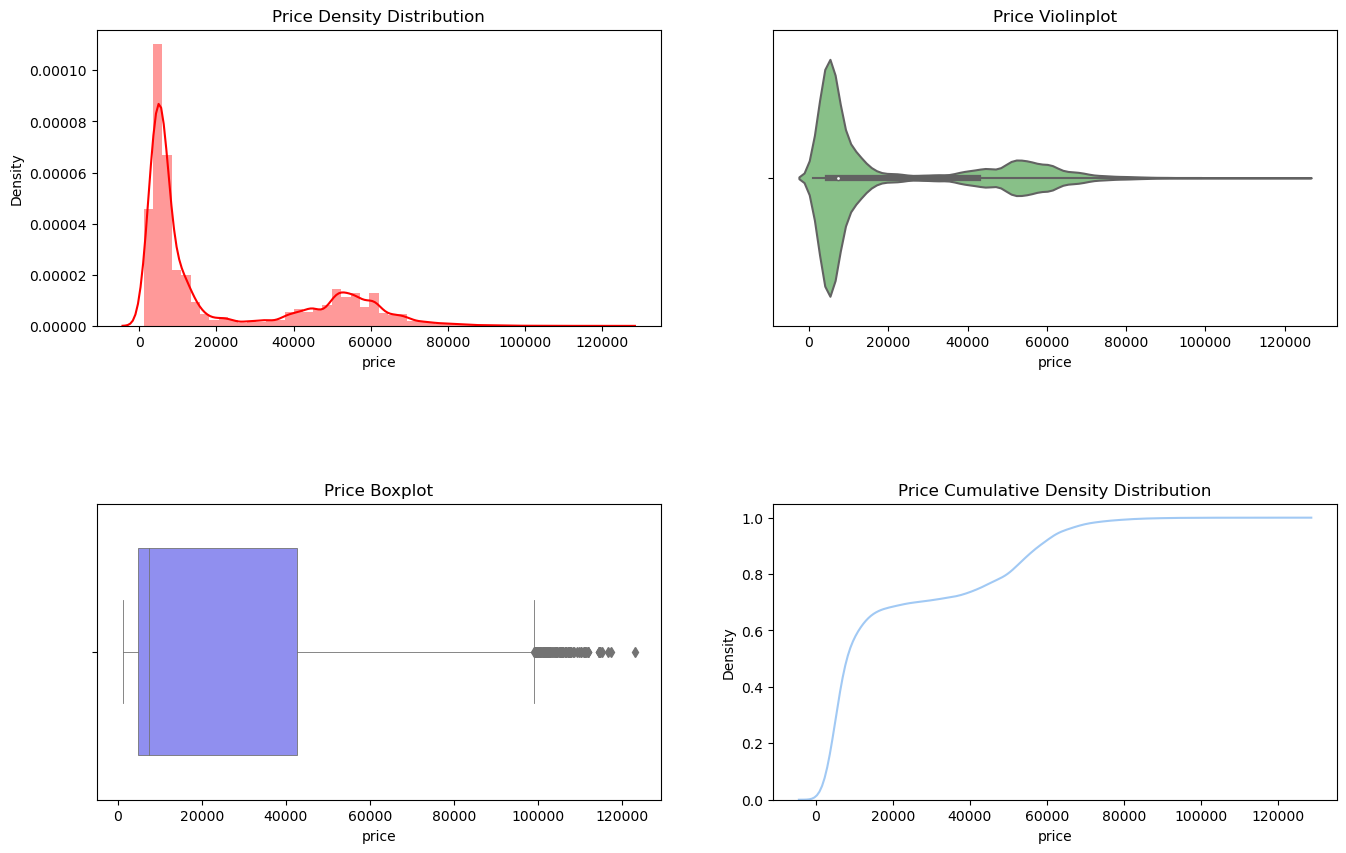

5 Point Summary of Days_left Attribute:
Days_left(min) : 1
Q1                    : 15.0
Q2(Median)            : 26.0
Q3                    : 38.0
Days_left(max) : 49


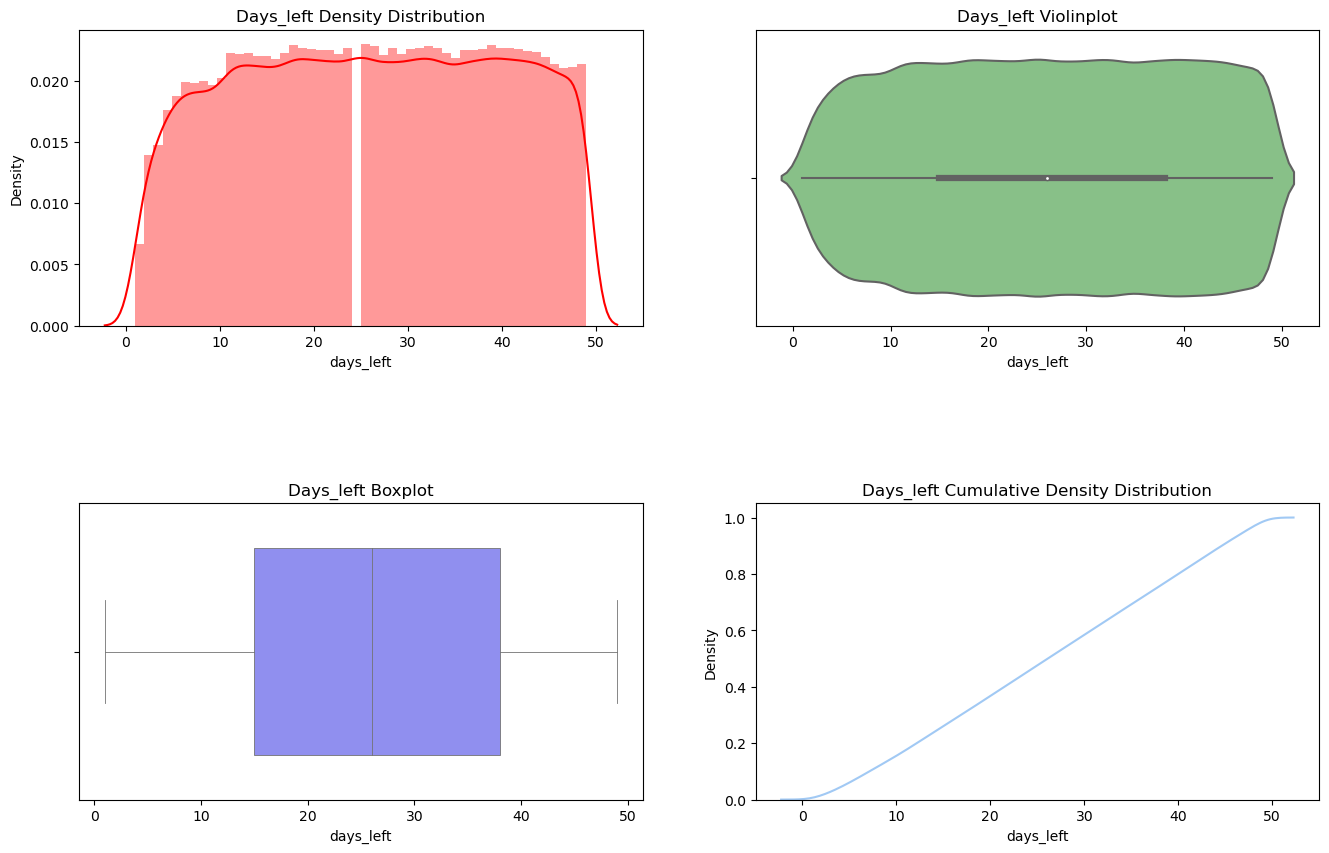

In [10]:
for num in cols_numeric:
    summary(num)

### Observation:
 - We can see that Duration and Price have Outliers, hence we might need to do outlier detection.
 - Duration and price is Skewed left, hence defining need for normalization.

### Univariate Analysis - Categorical

In [11]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = df.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    sns.countplot(x = x, data = df)

    fig.tight_layout()
    plt.show()

In [12]:
cols_categorical

['destination_city',
 'departure_time',
 'class',
 'airline',
 'stops',
 'source_city',
 'flight',
 'arrival_time']

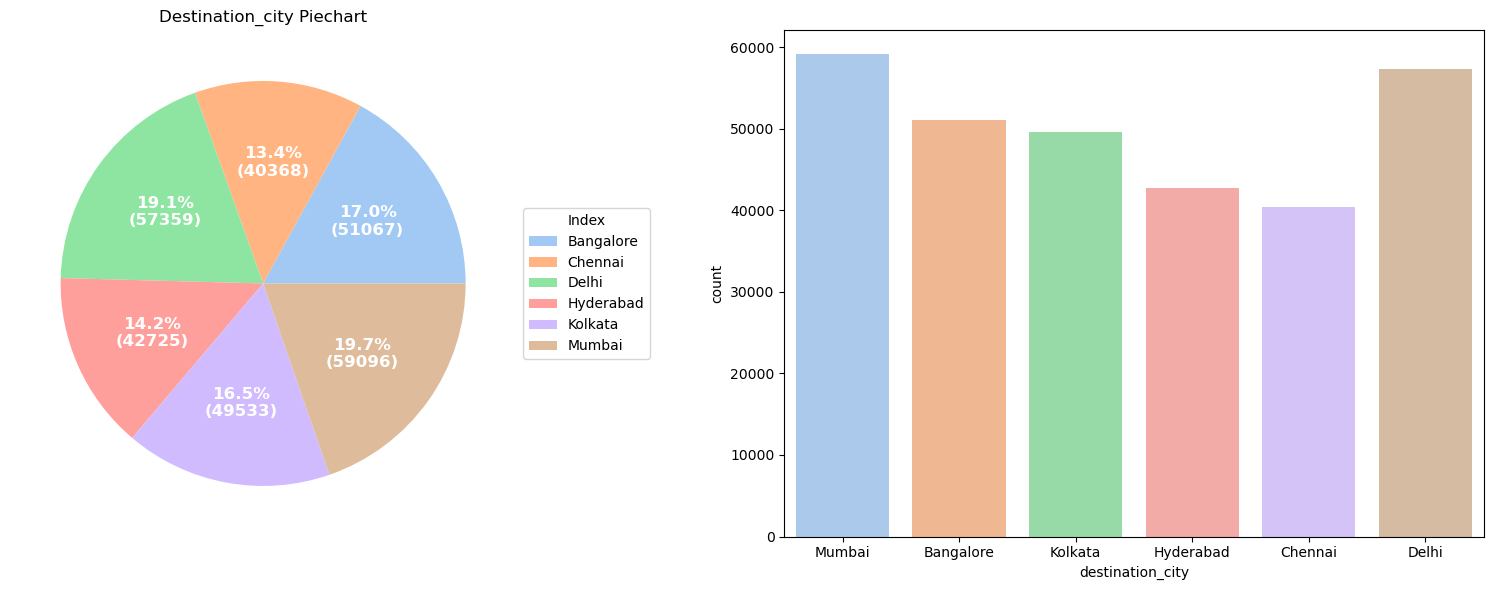

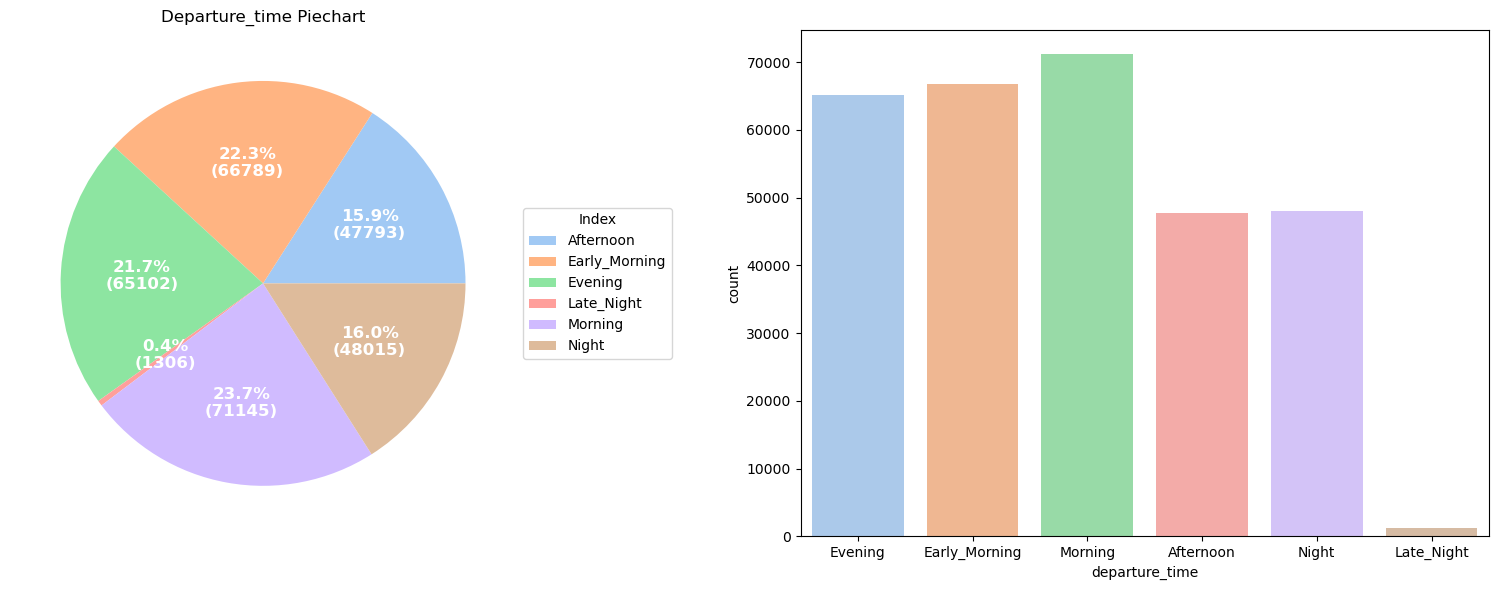

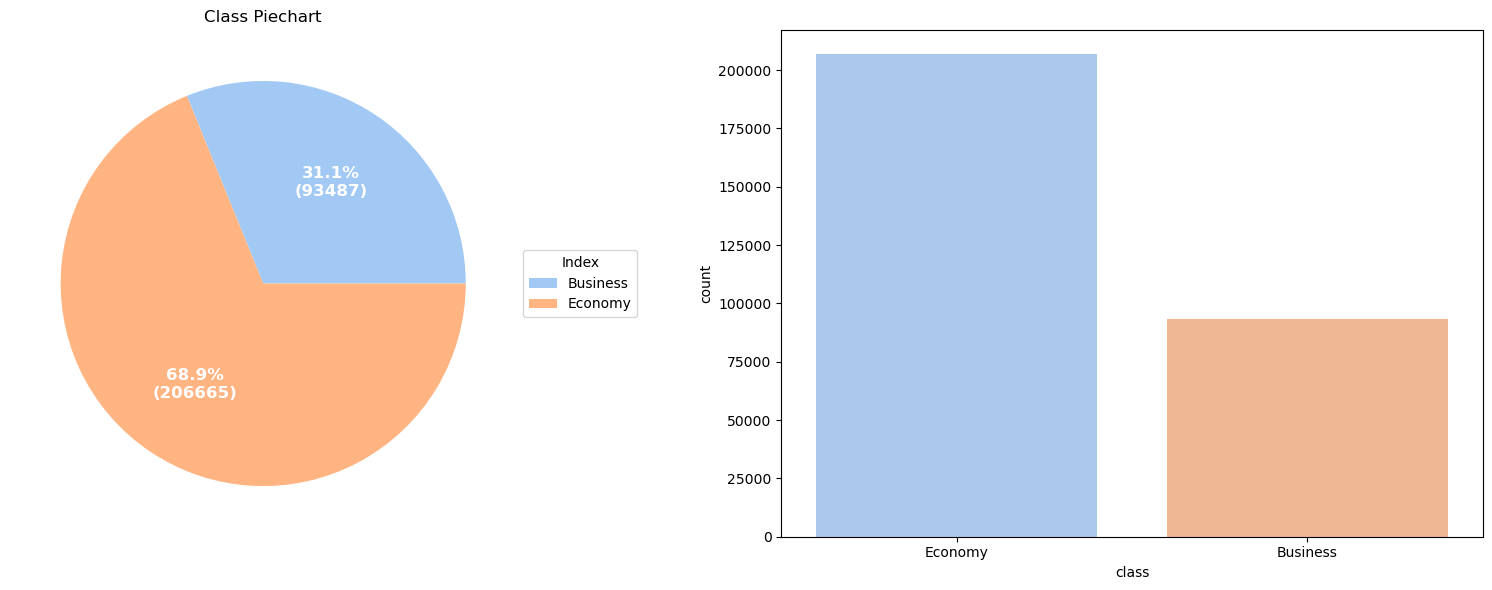

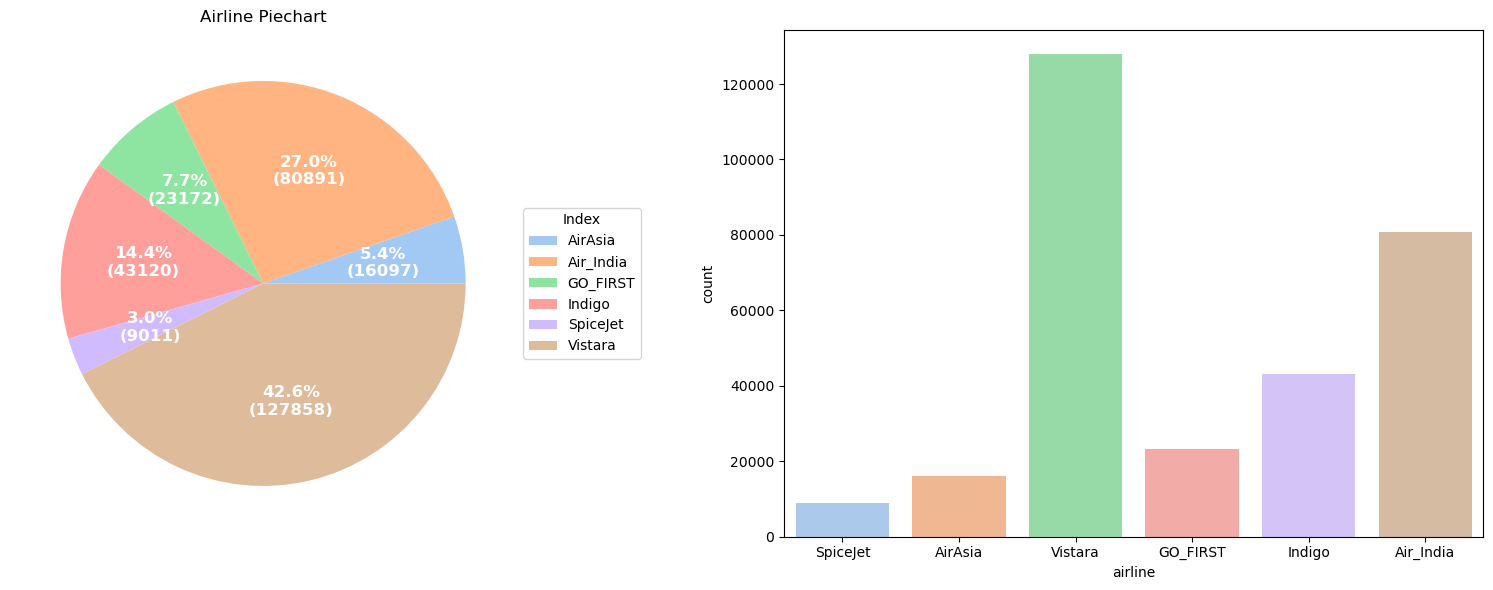

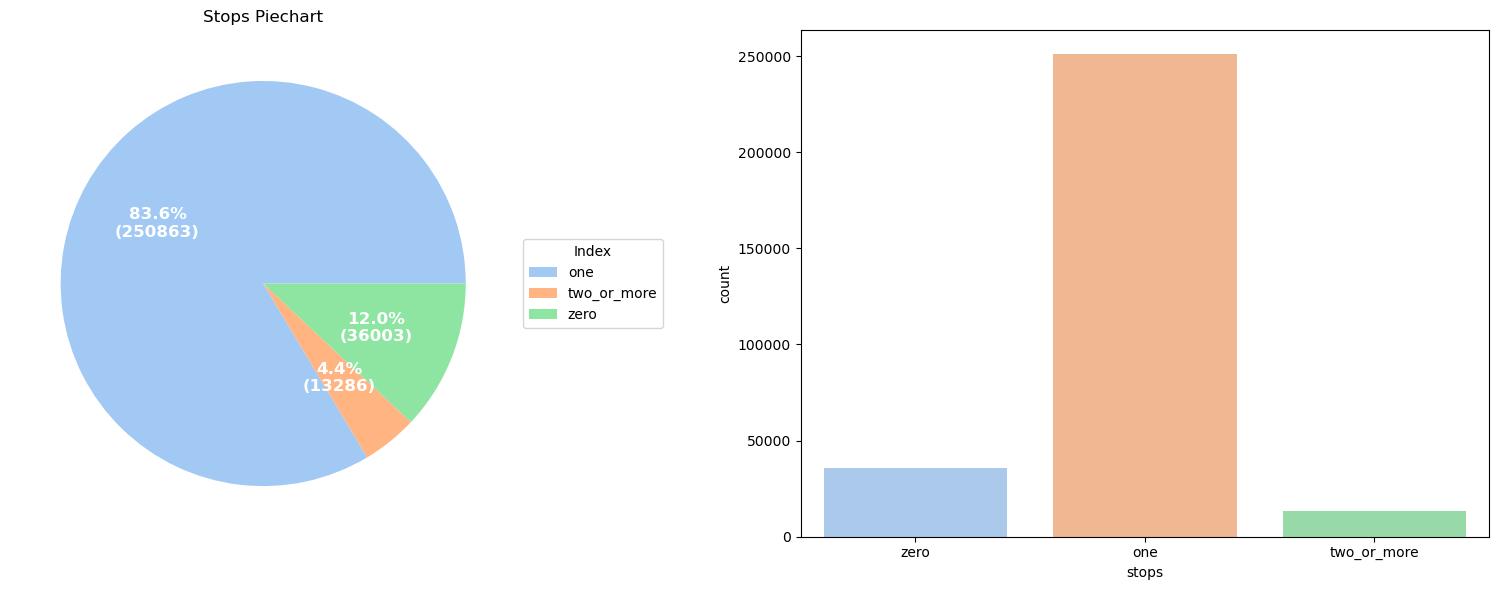

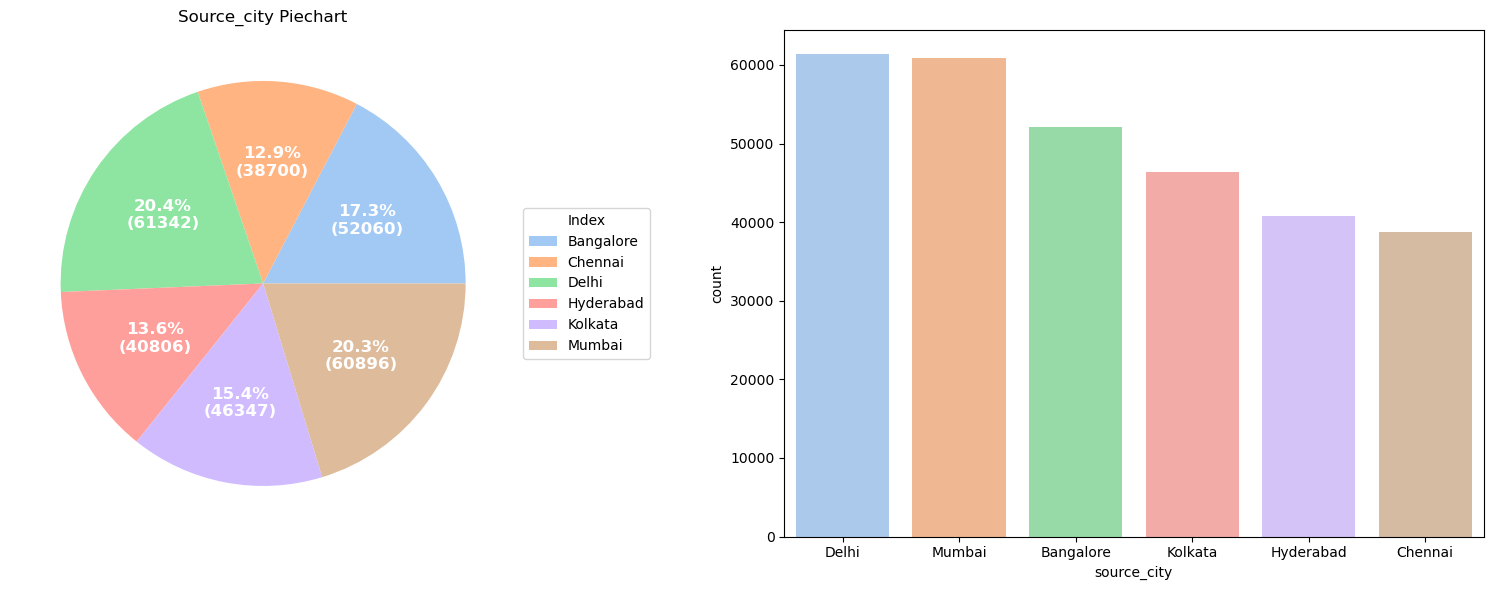

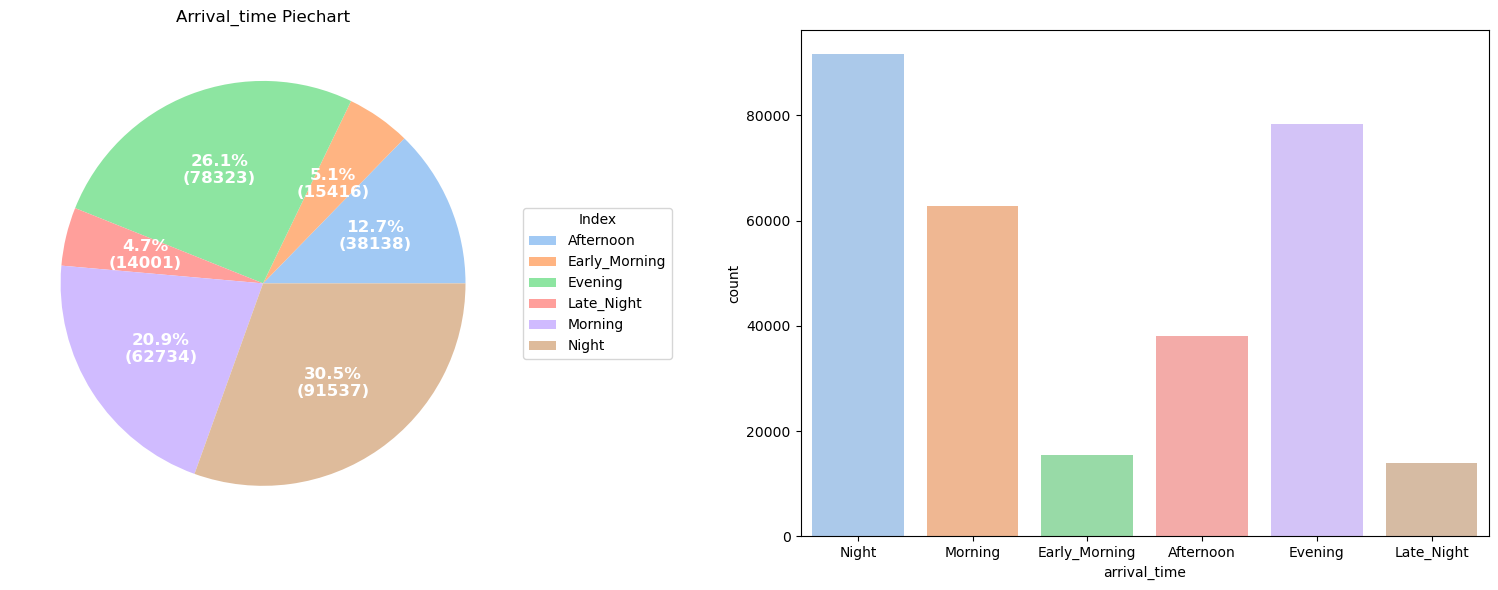

In [13]:
cols_categorical_relevant = list(filter(lambda x: x not in ['flight'], cols_categorical))

for cats in cols_categorical_relevant:
    cat_view(cats)

### Observation
- We can see that the top players in the field are Vistara, followed by AirIndia.
- Most of them prefer their arrival time at night or evening, this is making sense - since most of them would hate reaching out of business hours for local flights.
- Economy class is more preferred by many people, but it's fair to say that there is good amount of passengers choosing the business class as well.
- Most of them prefer One - Stop Flights. (Probably it is cheaper)
- It can be seen that people hate catching late night flights, hence companies might need to drop flight charges in order to increase business here. Other timings seem to be always busy.
- There seems to be greater business for flights between Delhi and Mumbai.

### Bi-Variate Analysis

#### Statistical Analysis

In [14]:
from scipy.stats import f_oneway, pearsonr, kruskal

data = df
categorical_columns= cols_categorical
numeric_columns = cols_numeric
# Perform ANOVA or Kruskal-Wallis for categorical features
anova_results = []
for column in categorical_columns:
    groups = [data[data[column] == level]['price'] for level in data[column].unique()]
    if len(groups) > 1:
        test_statistic, p_value = f_oneway(*groups)  # Use Kruskal-Wallis if assumptions not met
        anova_results.append((column, test_statistic, p_value))

# Convert results to a DataFrame for easier interpretation
anova_df = pd.DataFrame(anova_results, columns=['Feature', 'Test Statistic', 'P-value'])

# Filter for statistically significant categorical features (using a significance level, e.g., 0.05)
significant_categorical = anova_df[anova_df['P-value'] < 0.05]

# Calculate Pearson correlations for numeric features
correlation_results = []
for column in numeric_columns:
    corr, p_value = pearsonr(data[column], data['price'])
    correlation_results.append((column, corr, p_value))

# Convert results to a DataFrame for easier interpretation
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation', 'P-value'])

# Filter for statistically significant numeric features (using a significance level, e.g., 0.05)
significant_numeric = correlation_df[correlation_df['P-value'] < 0.05]

print("Significant Categorical Features:")
print(significant_categorical)

print("\nSignificant Numeric Features:")
print(significant_numeric)

Significant Categorical Features:
            Feature       Test Statistic              P-value
0  destination_city               193.06                 0.00
1    departure_time               319.24                 0.00
2             class         2,192,424.59                 0.00
3           airline            17,194.40                 0.00
4             stops             6,477.13                 0.00
5       source_city               145.06                 0.00
6            flight                72.88                 0.00
7      arrival_time             1,013.50                 0.00

Significant Numeric Features:
     Feature          Correlation              P-value
0   duration                 0.20                 0.00
1      price                 1.00                 0.00
2  days_left                -0.09                 0.00


### Observations:
Categorical Features: (ANOVA Results- Greater T-statistic,Greater the willingness to pay)
- It can be assessed the passengers do care about the airline service that they choose, the arrival time of flight, the class and the number of stops the flight has.

Numeric Features:
- We can say the the price of flight fares are increased by companies when it is close to the departure date, but this price reduction is very slight.
- Duration of flight has no strong correlation with price.

All features are statistically significant

## Research Questions

### 1. Does price vary with Airlines?

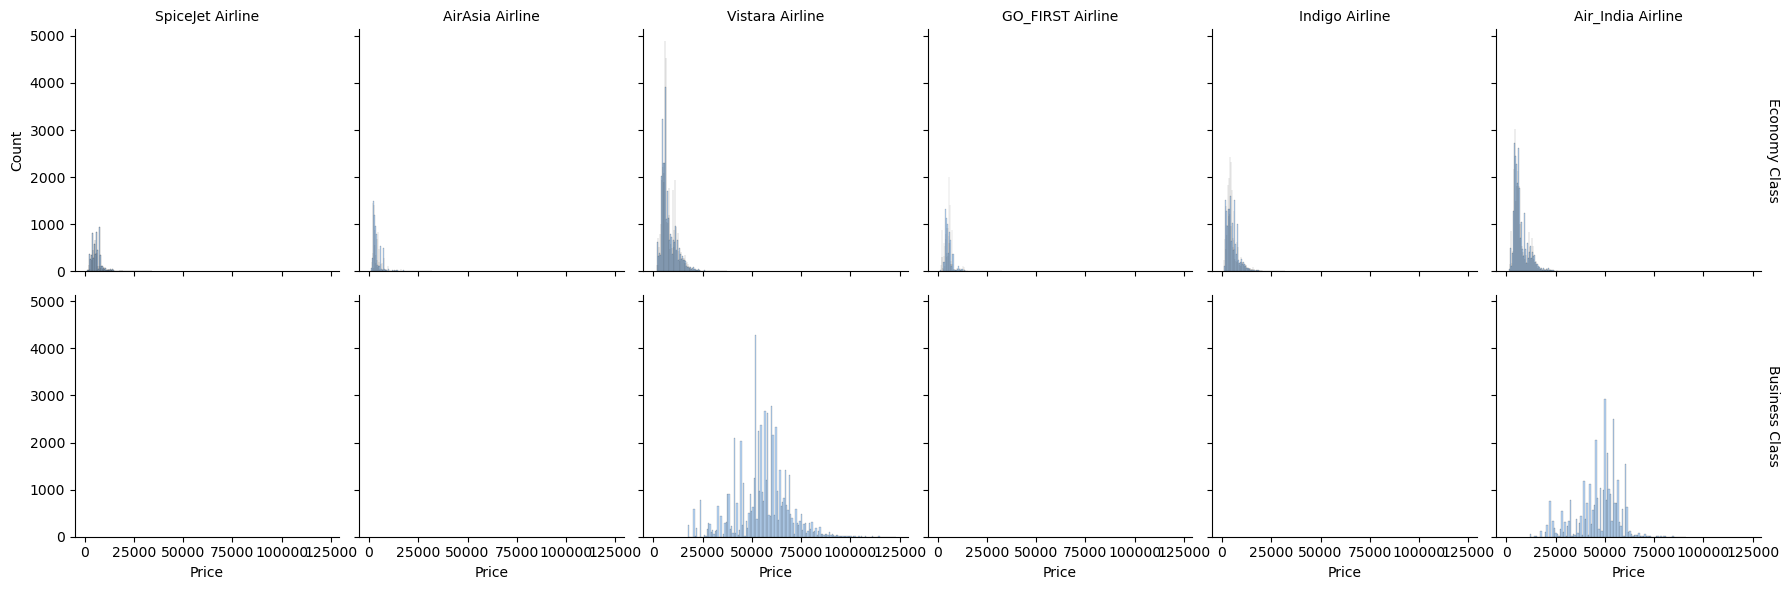

In [79]:
# Assuming df is your DataFrame
g = sns.FacetGrid(df, col='airline', row='class', margin_titles=True)
g.map_dataframe(sns.histplot, x='price')
g.set_axis_labels('Price')
g.set_titles(col_template="{col_name} Airline", row_template="{row_name} Class")
plt.show()

In [16]:
# Group the data by airline
grouped = data.groupby('airline')['price'].apply(list)

# Perform one-way ANOVA
statistic, p_value = f_oneway(*grouped)

alpha = 0.05  # significance level

print("ANOVA Results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: Price varies with Airlines.")
else:
    print("Fail to reject the null hypothesis: Price does not vary with Airlines.")

ANOVA Results:
Statistic: 17194.40209609235
P-value: 0.0
Reject the null hypothesis: Price varies with Airlines.


### Observation
- From, the above test we can say that price does vary based on airline, but a large amount of this effect because of lack of business class flights in other airlines apart from Air India and Vistara.

### 2. How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [17]:
from scipy.stats import ttest_ind
# Separate the data into two groups: 1-2 days before departure and others
last_minute_prices = df[df['days_left'] <= 2]['price']
other_prices = df[df['days_left'] > 2]['price']

# Perform independent t-test
statistic, p_value = ttest_ind(last_minute_prices, other_prices)

alpha = 0.05  # significance level

print("Independent T-Test Results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: Price is affected when bought 1-2 days before departure.")
else:
    print("Fail to reject the null hypothesis: Price is not significantly affected.")

Independent T-Test Results:
Statistic: 22.44459371804547
P-value: 1.7864110787631762e-111
Reject the null hypothesis: Price is affected when bought 1-2 days before departure.


Independent two-sample t-test, also known as Welch's t-test, to compare the means of two independent samples to determine if they come from populations with the same mean.

In [18]:
# Calculate average price for tickets bought 1-2 days before departure
average_price_last_minute = df[df['days_left'] <= 2]['price'].mean()

# Calculate average price for tickets bought earlier than 2 days before departure
average_price_earlier = df[df['days_left'] > 2]['price'].mean()

print(f"Average Price for 1-2 Days Before Departure: {average_price_last_minute}")
print(f"Average Price for Earlier Than 2 Days Before Departure: {average_price_earlier}")

# Compare the two average prices
price_difference = average_price_last_minute - average_price_earlier

if price_difference > 0:
    print(f"The average price is {price_difference:.2f} higher when bought 1-2 days before departure.")
else:
    print(f"The average price is {abs(price_difference):.2f} lower when bought 1-2 days before departure.")

Average Price for 1-2 Days Before Departure: 27421.169326390056
Average Price for Earlier Than 2 Days Before Departure: 20757.498484024472
The average price is 6663.67 higher when bought 1-2 days before departure.


### Observation
- Based on the test, Price is affected when bought 1-2 days before departure.
- Average Price for 1-2 Days Before Departure: 27421.169326390056
- Average Price for Earlier Than 2 Days Before Departure: 20757.498484024472
- The average price is 6663.67 lower when bought 1-2 days before departure.

### 3. Does ticket price change based on the departure time and arrival time?

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('price ~ departure_time * arrival_time', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-Way ANOVA Results:")
print(anova_table)

alpha = 0.05  # significance level

p_value_departure = anova_table.loc['departure_time', 'PR(>F)']
p_value_arrival = anova_table.loc['arrival_time', 'PR(>F)']
p_value_interaction = anova_table.loc['departure_time:arrival_time', 'PR(>F)']

if p_value_departure < alpha:
    print("Reject the null hypothesis: Ticket price varies with departure time.")
else:
    print("Fail to reject the null hypothesis: Ticket price does not vary with departure time.")

if p_value_arrival < alpha:
    print("Reject the null hypothesis: Ticket price varies with arrival time.")
else:
    print("Fail to reject the null hypothesis: Ticket price does not vary with arrival time.")

if p_value_interaction < alpha:
    print("Reject the null hypothesis: There is an interaction effect between departure time and arrival time.")
else:
    print("Fail to reject the null hypothesis: There is no interaction effect between departure time and arrival time.")

Two-Way ANOVA Results:
                                            sum_sq                   df  \
departure_time                  903,477,815,273.71                 5.00   
arrival_time                  2,652,889,012,427.71                 5.00   
departure_time:arrival_time   7,218,134,151,583.69                25.00   
Residual                    143,945,864,603,923.72           300,117.00   

                                               F               PR(>F)  
departure_time                            376.74                 0.00  
arrival_time                            1,106.22                 0.00  
departure_time:arrival_time               601.97                 0.00  
Residual                                     NaN                  NaN  
Reject the null hypothesis: Ticket price varies with departure time.
Reject the null hypothesis: Ticket price varies with arrival time.
Reject the null hypothesis: There is an interaction effect between departure time and arrival time.


group1 and group2: These are the two groups being compared.

meandiff: This represents the difference in means between the two groups. In this case, it's the difference in means of ticket prices.

p-adj: This is the adjusted p-value resulting from the pairwise comparison. It's compared against a significance level (usually 0.05) to determine whether the difference in means is statistically significant.

lower and upper: These are the lower and upper bounds of the confidence interval for the mean difference.

reject: This column indicates whether the null hypothesis of no significant difference between the means of the two groups can be rejected or not. If reject is True, it means that the difference in means is statistically significant; if False, it means the difference is not statistically significant.

In [20]:
import pandas as pd
from statsmodels.stats.multicomp import MultiComparison


# Combine departure_time and arrival_time for grouping
df['group'] = df['departure_time'] + '_' + df['arrival_time']

# Perform Tukey's HSD post hoc analysis
m_comp = MultiComparison(df['price'], df['group'])
tukey_result = m_comp.tukeyhsd()

# Convert the results to a pandas DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])



In [21]:
tukey_df.shape

(630, 7)

In [23]:
tukey_df.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Afternoon_Afternoon,Afternoon_Early_Morning,"6,417.77",0.00,"3,661.24","9,174.29",True
1,Afternoon_Afternoon,Afternoon_Evening,807.09,0.99,-740.95,"2,355.13",False
2,Afternoon_Afternoon,Afternoon_Late_Night,"-3,930.13",0.00,"-5,970.07","-1,890.19",True
3,Afternoon_Afternoon,Afternoon_Morning,"11,314.83",0.00,"9,570.84","13,058.83",True
4,Afternoon_Afternoon,Afternoon_Night,"4,356.05",0.00,"2,877.88","5,834.23",True


In [25]:
# Filter the DataFrame to include only rows where 'reject' is True
filtered_df_reject_true = filtered_df[filtered_df['reject']]

print("Filtered Tukey's HSD Results with 'reject' True:")
filtered_df_reject_true.shape

Filtered Tukey's HSD Results with 'reject' True:


(501, 8)

### Observation:

- Ticket price varies with departure time.
- Ticket price varies with arrival time.
- There is an interaction effect between departure time and arrival time, and these unique pairs can be analysed.
- For these interaction effects, there are 501 instances of unique pairs there is a difference in the prices.

There are certain flight schedules where the price is greater

### 4. How the price changes with change in Source and Destination?

In [41]:
# Perform two-way ANOVA
formula = 'price ~ source_city * destination_city'
model = ols(formula, data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

alpha = 0.05  # significance level

print("Two-Way ANOVA Results:")
print(anova_table)

p_value_source_city = anova_table.loc['source_city', 'PR(>F)']
p_value_destination_city = anova_table.loc['destination_city', 'PR(>F)']
p_value_interaction = anova_table.loc['source_city:destination_city', 'PR(>F)']

if p_value_source_city < alpha:
    print("Reject the null hypothesis: Source city has a significant effect on ticket prices.")
else:
    print("Fail to reject the null hypothesis: Source city does not significantly affect ticket prices.")

if p_value_destination_city < alpha:
    print("Reject the null hypothesis: Destination city has a significant effect on ticket prices.")
else:
    print("Fail to reject the null hypothesis: Destination city does not significantly affect ticket prices.")

if p_value_interaction < alpha:
    print("Reject the null hypothesis: There is an interaction effect between source city and destination city.")
else:
    print("Fail to reject the null hypothesis: There is no interaction effect between source city and destination city.")

Two-Way ANOVA Results:
                                             sum_sq                   df  \
source_city                      -43,263,997,179.83                 5.00   
destination_city                      43,628,591.53                 5.00   
source_city:destination_city       2,191,645,577.14                25.00   
Residual                     153,357,860,311,128.00           300,123.00   

                                                F               PR(>F)  
source_city                                -16.93                 1.00  
destination_city                             0.02                 0.98  
source_city:destination_city                 0.17                 0.68  
Residual                                      NaN                  NaN  
Fail to reject the null hypothesis: Source city does not significantly affect ticket prices.
Fail to reject the null hypothesis: Destination city does not significantly affect ticket prices.
Fail to reject the null hypothesis: Ther

C:\Users\TG132CB\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\TG132CB\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\TG132CB\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [40]:
# Calculate mean price for each source-destination pair
mean_prices = df.groupby(['source_city', 'destination_city'])['price'].mean().reset_index()

# Sort by mean price to find highest and lowest pairs
highest_pair = mean_prices.nlargest(5, 'price')
lowest_pair = mean_prices.nsmallest(5, 'price')

print("Source-Destination Pair with Highest Mean Price:")
print(highest_pair)

print("\nSource-Destination Pair with Lowest Mean Price:")
print(lowest_pair)

Source-Destination Pair with Highest Mean Price:
   source_city destination_city                price
5      Chennai        Bangalore            25,081.85
21     Kolkata          Chennai            23,660.36
3    Bangalore          Kolkata            23,500.06
0    Bangalore          Chennai            23,321.85
25      Mumbai        Bangalore            23,147.87

Source-Destination Pair with Lowest Mean Price:
   source_city destination_city                price
17   Hyderabad            Delhi            17,243.95
12       Delhi        Hyderabad            17,347.29
1    Bangalore            Delhi            17,723.31
10       Delhi        Bangalore            17,880.22
27      Mumbai            Delhi            18,725.32


### Observation
- Source city does not significantly affect ticket prices.
- Destination city does not significantly affect ticket prices.
- The combination of Source City and Destination city does not affect the price of flights.

### 5. How does the ticket price vary between Economy and Business class?

In [44]:
# Calculate mean and standard deviation for each combination of airline and class
summary = df.groupby(['airline', 'class'])['price'].agg(['mean', 'std']).reset_index()

print("Summary of Prices by Airline and Class:")
print(summary)

Summary of Prices by Airline and Class:
     airline     class                 mean                  std
0    AirAsia   Economy             4,091.07             2,824.06
1  Air_India  Business            47,131.04            10,521.93
2  Air_India   Economy             7,313.68             3,989.52
3   GO_FIRST   Economy             5,652.01             2,513.87
4     Indigo   Economy             5,324.22             3,268.89
5   SpiceJet   Economy             6,179.28             2,999.63
6    Vistara  Business            55,477.03            13,225.35
7    Vistara   Economy             7,806.94             3,854.57


From this we can say that only Air India and Vistara can be considered for our analysis, other airline dont have data for the business class 

In [43]:
unique_airlines = df['airline'].unique()

alpha = 0.05  # significance level

for airline in unique_airlines:
    economy_prices = df[(df['airline'] == airline) & (df['class'] == 'Economy')]['price']
    business_prices = df[(df['airline'] == airline) & (df['class'] == 'Business')]['price']

    try:
        t_statistic, p_value = ttest_ind(economy_prices, business_prices)
    except ValueError:
        print(f"Airline: {airline}")
        print("Insufficient data for hypothesis testing.")
        print()
        continue

    print(f"Airline: {airline}")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")

    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in prices between Economy and Business class.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in prices between Economy and Business class.")

    print()


Airline: SpiceJet
T-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: There is no significant difference in prices between Economy and Business class.

Airline: AirAsia
T-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: There is no significant difference in prices between Economy and Business class.

Airline: Vistara
T-Statistic: -893.6739817035865
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in prices between Economy and Business class.

Airline: GO_FIRST
T-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: There is no significant difference in prices between Economy and Business class.

Airline: Indigo
T-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: There is no significant difference in prices between Economy and Business class.

Airline: Air_India
T-Statistic: -753.7487298950282
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in prices between Economy and Business cla

In [45]:
# Calculate mean prices for Business and Economy class for each airline
class_means = df.groupby(['airline', 'class'])['price'].mean().unstack()

# Calculate the average price difference between Business and Economy class for each airline
class_means['Price_Difference'] = class_means['Business'] - class_means['Economy']

print("Average Price Differences Between Business and Economy Class:")
print(class_means[['Price_Difference']])

Average Price Differences Between Business and Economy Class:
class         Price_Difference
airline                       
AirAsia                    NaN
Air_India            39,817.36
GO_FIRST                   NaN
Indigo                     NaN
SpiceJet                   NaN
Vistara              47,670.08


### Observation:
- From this we can say that only Air India and Vistara can be considered for our analysis, other airline dont have data for the business class.
- For both Air india and Vistara there is a significant price difference
- For Air India the difference is around 40,000 and Vistara around 47,500.

## Data Preprocessing and Model Bulding

In [67]:
new_column_names = {'class': 'class_'}
df.rename(columns=new_column_names, inplace=True)

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Split data into features and target
X = df.drop(columns=['price','flight','group'])
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer for preprocessing
categorical_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class_']
numerical_features = ['duration', 'days_left']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_features),  # One-hot encoding for categorical features with dense output
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough')  # Include other columns as-is

# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Function to predict price using the trained model
def predict_price(features):
    features = pd.DataFrame([features])
    prediction = pipeline.predict(features)
    return prediction[0]

# Example usage of the prediction function
new_features = {
    'airline': 'SpiceJet',
    'source_city': 'Delhi',
    'departure_time': 'Evening',
    'stops': 'zero',
    'arrival_time': 'Night',
    'destination_city': 'Mumbai',
    'class_': 'Economy',
    'duration': 2.5,
    'days_left': 5
}

predicted_price = predict_price(new_features)
print("Predicted Price:", predicted_price)



Mean Squared Error: 7773142.662965195
Predicted Price: 6613.8


### Accuracy Metric - R2 Score

In [71]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9849206402207609


## Saving the pipeline as a pickle file for API creation

In [72]:
import joblib

# Save the trained pipeline as a pickle file
pipeline_filename = 'flight_price_pipeline.pkl'
joblib.dump(pipeline, pipeline_filename)


['flight_price_pipeline.pkl']